In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [111]:
df = pd.read_csv("simplelinearregression.csv")

df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      7 non-null      int64
 1   Premium  7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [113]:
df.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


In [114]:
df.isna().count()

Age        7
Premium    7
dtype: int64

<Axes: >

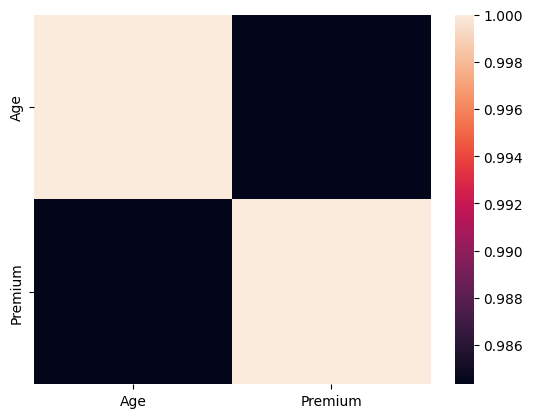

In [115]:
data_corr = df.corr()
sns.heatmap(data_corr)

In [116]:
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0
        self.error = 0

    def fit(self, x, y, m=0, b=0, learning_rate=0.01, epoch=100):
        self.m = m
        self.b = b
        n = float(len(x))
        for i in range(epoch):
            current_y = self.m * x + self.b
            self.error = sum((y - current_y)**2) / n
            m_gradient = -(2/n) * sum(x * (y-current_y))
            b_gradient = -(2/n) * sum(y - current_y)

            self.m = self.m - learning_rate * m_gradient
            self.b = self.b - learning_rate * b_gradient

    def predict(self, x):
        return self.m * x + self.b

    def scores(self, y_true, y_pred):
        ss_res = sum((y_true - y_pred)**2)
        ss_tot = sum((y_true - np.average(y_true))**2)

        return 1 - ss_res / ss_tot

        


In [117]:
def Train_Test_Split(x, y, test_size=0.2, random_seed=None):
    n = len(x)
    if random_seed:
        np.random.seed(random_seed)

    test_size = int(n * test_size)

    indices = np.random.permutation(n)

    test_indices = indices[:test_size]

    train_indices = indices[test_size:]

    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return x_train, x_test, y_train, y_test

In [118]:
x = np.array(df.Age.array)
y = np.array(df.Premium.array)

X_train, X_test, y_train, y_test = Train_Test_Split(x, y, 0.4, 42)
# x, X_train, y, y_train

In [119]:
# X_train = X_train.reshape(-1, 1)
# y_train

In [120]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train, learning_rate=0.0001, epoch=10000)

In [121]:
X_train, linear_regression.predict(X_train),y_train

(array([31, 23, 28, 26, 33], dtype=int64),
 array([25675.48274693, 19030.86174941, 23183.74987286, 21522.59462348,
        27336.63799631]),
 array([26500, 18000, 24000, 21000, 27000], dtype=int64))

In [124]:
score = linear_regression.scores(y_train, linear_regression.predict(X_train))

"accuracy : " + str(score * 100)[:5] + "%"

'accuracy : 95.16%'

In [126]:
score = linear_regression.scores(y_test, linear_regression.predict(X_test))

"accuracy : " + str(score * 100)[:5] + "%"

'accuracy : -172.%'

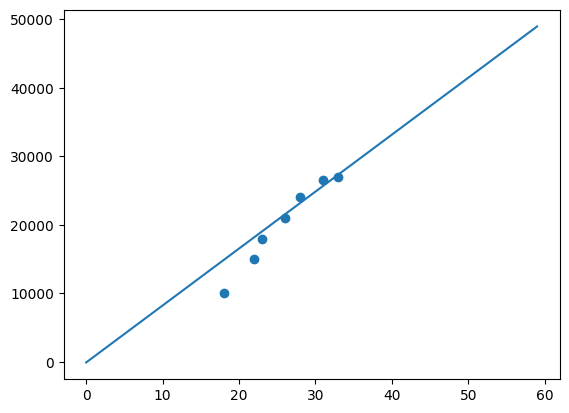

In [123]:
plt.scatter(x, y)
x_graphics = np.array([i for i in range(60)])
plt.plot(x_graphics, linear_regression.predict(x_graphics))